In [1]:
import pandas as pd
from PIL import Image
from urllib.request import urlopen

In [2]:
df=pd.read_html('https://fbref.com/en/players/49296448/Joshua-Kimmich')[0]
df

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.19,91.0
1,npxG,0.13,89.0
2,Shots Total,1.47,83.0
3,Assists,0.40,99.0
4,xA,0.26,98.0
5,npxG+xA,0.39,97.0
6,Shot-Creating Actions,4.64,98.0
7,NaN,NaN,NaN
8,Passes Attempted,84.80,97.0
9,Pass Completion %,83.4%,45.0


In [3]:
new_df=df.dropna() 
new_df.reset_index(drop=True,inplace=True)
new_df

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.19,91.0
1,npxG,0.13,89.0
2,Shots Total,1.47,83.0
3,Assists,0.40,99.0
4,xA,0.26,98.0
5,npxG+xA,0.39,97.0
6,Shot-Creating Actions,4.64,98.0
7,Passes Attempted,84.80,97.0
8,Pass Completion %,83.4%,45.0
9,Progressive Passes,9.17,99.0


In [4]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, FontManager, add_image

In [5]:
# parameter list
params = [
    "Non-Penalty Goals", "npxG", "Assists","xA","Shots Total","Shot-Creating Actions",
    "Interceptions","Clearances","Aerials won",
    "Passes Attempted","Pass Completion %","Progressive Passes","Progressive Carries","Dribbles Completed","Touches (Att Pen)"
]

In [6]:
values=[]
for i in range(15):
    for j in range(20):
      if(params[i]==new_df['Statistic'][j]):
        values.append(new_df['Percentile'][j])
print(values)

[91.0, 89.0, 99.0, 98.0, 83.0, 98.0, 80.0, 33.0, 28.0, 97.0, 45.0, 99.0, 93.0, 47.0, 65.0]


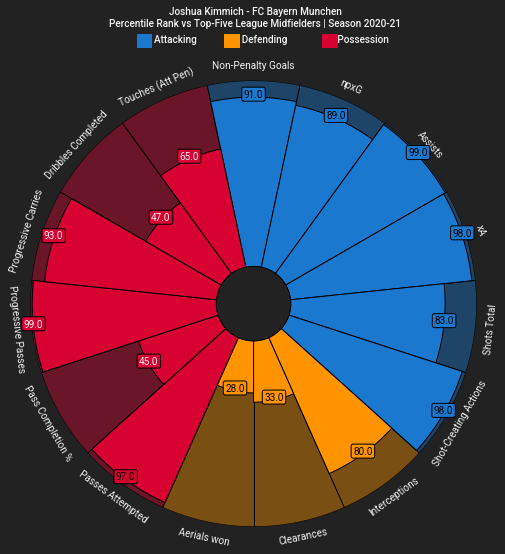

In [7]:
# https://mplsoccer.readthedocs.io/en/latest/gallery/pizza_plots/plot_pizza_dark_theme.html

font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

# color for the slices and text
slice_colors = ["#1A78CF"] * 6 + ["#FF9300"] * 3 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "Joshua Kimmich - FC Bayern Munchen", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.955,
    "Percentile Rank vs Top-Five League Midfielders | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add text
fig.text(
    0.34, 0.93, "Attacking                  Defending                    Possession", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

'''
# add image
URL = "https://github.com/andrewRowlinson/mplsoccer-assets/blob/main/fdj_cropped.png?raw=true"
fdj_cropped = Image.open(urlopen(URL))
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   
'''
plt.show()
fig.savefig('outputs/Kimmich-percentilePizzaChart.png', dpi=200, facecolor=fig.get_facecolor(), edgecolor='None', transparent=True)

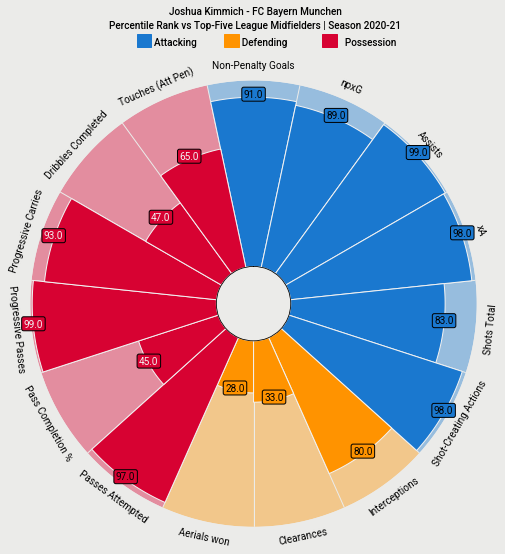

In [8]:

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values ,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Joshua Kimmich - FC Bayern Munchen", size=16,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs Top-Five League Midfielders | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add text
fig.text(
    0.34, 0.925, "Attacking                  Defending                       Possession", size=14,
    fontproperties=font_bold.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])
plt.show()
fig.savefig('outputs/Kimmich-percentilePizzaChart-Colorful.png', dpi=200, facecolor=fig.get_facecolor(), edgecolor='None', transparent=True)